In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read Data

In [2]:
import pandas as pd
A = pd.read_csv("D:/Downloads/Projects/training_set.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from preprocessing_6PM import replacer
replacer(A)

In [6]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Define Y

In [7]:
Y = A[["Loan_Status"]]

# Drop Statistically Unimportant

In [8]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [9]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# Exploratory analysis

In [10]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
imp_cols = []

In [12]:
from preprocessing_6PM import ANOVA, chisquare
for i in con:
    q = ANOVA(A,"Loan_Status",i)
    print("-----------------")
    print("Loan_Status vs ",i)
    print("pval: ",q)
    if(q < 0.5):
        imp_cols.append(i)

-----------------
Loan_Status vs  ApplicantIncome
pval:  0.903
-----------------
Loan_Status vs  CoapplicantIncome
pval:  0.142
-----------------
Loan_Status vs  LoanAmount
pval:  0.368
-----------------
Loan_Status vs  Loan_Amount_Term
pval:  0.604
-----------------
Loan_Status vs  Credit_History
pval:  0.0


In [13]:
for i in cat:
    q = chisquare(A,"Loan_Status",i)
    print("-------------------------")
    print("Loan_Status vs ",i)
    print("Pval: ",q)
    if(q < 0.5):
        imp_cols.append(i)

-------------------------
Loan_Status vs  Gender
Pval:  0.7391461310869638
-------------------------
Loan_Status vs  Married
Pval:  0.029608580862582116
-------------------------
Loan_Status vs  Dependents
Pval:  0.3688663081366005
-------------------------
Loan_Status vs  Education
Pval:  0.04309962129357355
-------------------------
Loan_Status vs  Self_Employed
Pval:  0.9710746411403309
-------------------------
Loan_Status vs  Property_Area
Pval:  0.0021360187811644915


In [14]:
imp_cols

['CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Married',
 'Dependents',
 'Education',
 'Property_Area']

# Preprocessing

In [15]:
X.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [16]:
from numpy import log

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col] = q

In [17]:
skew_rem(X,'ApplicantIncome')
skew_rem(X,'CoapplicantIncome')

In [18]:
X.skew()

ApplicantIncome      0.477562
CoapplicantIncome   -0.172920
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [19]:
from preprocessing_6PM import data_prep
Xnew = data_prep(X[imp_cols])

In [20]:
Xnew.head()

,CoapplicantIncome,LoanAmount,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.000000,0.45164,1,0,1,0,0,0,1,0,0,0,1
1,0.782215,-0.219273,0.45164,0,1,0,1,0,0,1,0,1,0,0
2,-1.107731,-0.957641,0.45164,0,1,1,0,0,0,1,0,0,0,1
3,0.897656,-0.314547,0.45164,0,1,1,0,0,0,0,1,0,0,1
4,-1.107731,-0.064454,0.45164,1,0,1,0,0,0,1,0,0,0,1


# Divide Data into traing and testing split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create ML Model

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

# Create Predictions

In [23]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

# Error/Loss Overfitting?

In [24]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [25]:
tr_acc

0.8044806517311609

In [26]:
ts_acc

0.8130081300813008

# Try tree Model

In [27]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Xnew = data_prep(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [28]:
tr_acc

1.0

In [29]:
ts_acc

0.7154471544715447

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
def tree(dtc):
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    return tr_acc,ts_acc

In [32]:
tree(dtc)

(1.0, 0.6747967479674797)

In [33]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.8211382113821138)
(0.8268839103869654, 0.7886178861788617)
(0.8370672097759674, 0.8048780487804879)
(0.8553971486761711, 0.7886178861788617)
(0.8737270875763747, 0.7804878048780488)
(0.890020366598778, 0.7723577235772358)
(0.90020366598778, 0.7642276422764228)
(0.9226069246435845, 0.7642276422764228)
(0.9389002036659878, 0.7154471544715447)
(0.9531568228105907, 0.6991869918699187)
(0.9613034623217923, 0.6910569105691057)
(0.9674134419551935, 0.6747967479674797)
(0.9796334012219959, 0.6829268292682927)
(0.9877800407331976, 0.7073170731707317)
(0.9959266802443992, 0.6910569105691057)
(0.9979633401221996, 0.6829268292682927)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)


In [34]:
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    print(tree(dtc))

(1.0, 0.6910569105691057)
(0.9877800407331976, 0.6991869918699187)
(0.9694501018329938, 0.7073170731707317)
(0.955193482688391, 0.6910569105691057)
(0.9368635437881874, 0.6829268292682927)
(0.9226069246435845, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9063136456211812, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.8961303462321792, 0.6910569105691057)
(0.890020366598778, 0.6747967479674797)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.879837067209776, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6991869918699187)
(0.8757637474541752, 0.6991869918699187)
(0.8716904276985743, 0.69918699186

In [35]:
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print(tree(dtc))

(0.9470468431771895, 0.6747967479674797)
(0.9144602851323829, 0.6910569105691057)
(0.8859470468431772, 0.6991869918699187)
(0.8757637474541752, 0.7398373983739838)
(0.8574338085539714, 0.6829268292682927)
(0.8472505091649695, 0.7154471544715447)
(0.8411405295315683, 0.7154471544715447)
(0.8411405295315683, 0.7235772357723578)
(0.8309572301425662, 0.7560975609756098)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8289205702647657, 0.7723577235772358)
(0.8309572301425662, 0.7560975609756098)
(0.8268839103869654, 0.7479674796747967)
(0.8228105906313645, 0.7560975609756098)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.6991869918699187)
(0.8105906313645621, 0.6829268292682927)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8065173116089613,

# Try AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tree(abc)

(0.9063136456211812, 0.7073170731707317)

In [37]:
for i in range(2,50):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
    print(tree(abc))

(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211812, 0.7073170731707317)
(0.9063136456211

In [38]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)

# make predictions using best model

In [39]:
B = pd.read_csv("D:/Downloads/Projects/testing_set.csv")

In [40]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
X = B.drop(labels=["Loan_ID"],axis=1)
replacer(X)
Xnew = data_prep(X)
pred = model.predict(Xnew)

In [42]:
B['Loan_Status_pred'] = pred

In [43]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [44]:
pd.DataFrame([Xnew.columns,dtc.feature_importances_]).T

,0,1
0,ApplicantIncome,0.0
1,CoapplicantIncome,0.042743
2,LoanAmount,0.020849
3,Loan_Amount_Term,0.0
4,Credit_History,0.936407
5,Gender_Female,0.0
6,Gender_Male,0.0
7,Married_No,0.0
8,Married_Yes,0.0
9,Dependents_0,0.0


# identify customer segments

In [45]:
X = A[["Credit_History","LoanAmount","CoapplicantIncome"]]

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=["Credit_History","LoanAmount","CoapplicantIncome"])

In [47]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
model = km.fit(Xnew)

In [48]:
X['Cluster'] = model.labels_

In [49]:
q = []
for i in X.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [50]:
X.Credit_History = q

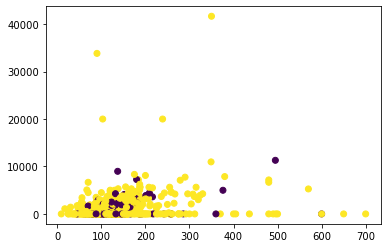

In [51]:
import matplotlib.pyplot as plt
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(A['Loan_Status'])

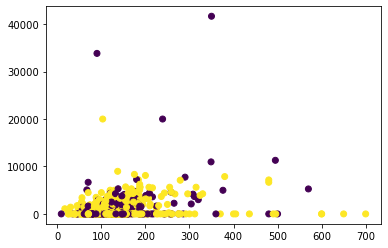

In [53]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)

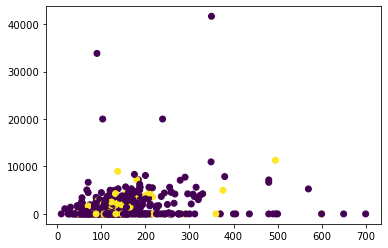

In [54]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

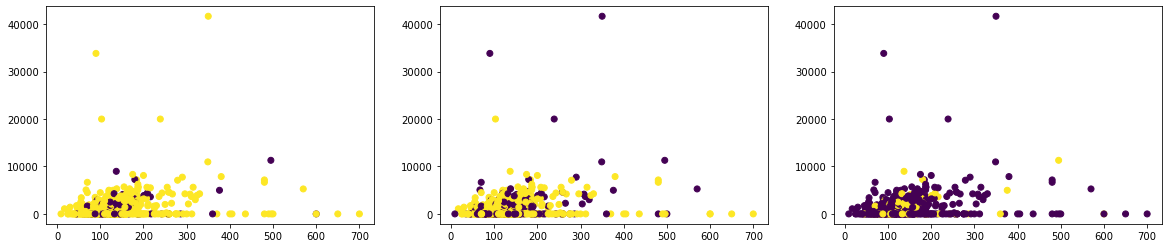

In [55]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)
plt.subplot(1,3,2)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)
plt.subplot(1,3,3)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

# If customer is not eligible fot the input required amount and duration:
    a) What can be amount for the given duration (regression)

# prepare Training Data

In [56]:
P1 = A[A.Loan_Status == "Y"]

In [57]:
P2 = B[B.Loan_Status_pred =="Y"]

In [58]:
P2 = P2.rename({"Loan_Status_pred":"Loan_Status"},axis=1)

In [59]:
trd = pd.concat([P1,P2])

# Missing Data

In [60]:
replacer(trd)

In [61]:
trd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

In [63]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [64]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

# Define X and Y

In [65]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)

In [66]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,725)
Xnew = X1.join(X2)

In [67]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.115076,-0.812679,0.299641,0.178911,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.398192,-0.812679,0.299641,0.178911,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,-0.473317,0.527410,0.299641,0.178911,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,0.142280,-0.812679,0.299641,0.178911,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,0.037248,1.571975,0.299641,0.178911,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [69]:
trd.corr()[["LoanAmount"]]

,LoanAmount
ApplicantIncome,0.579186
CoapplicantIncome,0.142011
LoanAmount,1.000000
Loan_Amount_Term,0.059974
Credit_History,-0.095110


In [71]:
for i in X.columns:
    if(X[i].dtypes =="object"):
        print("-----------------------")
        print("LoanAmount vs ",i)
        print(ANOVA(trd,i,"LoanAmount"))

-----------------------
LoanAmount vs  Gender
0.003
-----------------------
LoanAmount vs  Married
0.0
-----------------------
LoanAmount vs  Dependents
0.0
-----------------------
LoanAmount vs  Education
0.0
-----------------------
LoanAmount vs  Self_Employed
0.0
-----------------------
LoanAmount vs  Property_Area
0.808


# create ML Model

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [73]:
from preprocessing_6PM import find_overfit_con

In [74]:
find_overfit_con(lm,xtrain,xtest,ytrain,ytest)

training error:  35.979071650096074
testing error:  38.317567530523455


# Prepare data for making Predictions

In [75]:
test = B[B.Loan_Status_pred == "N"]

In [76]:
test = test.drop(labels=["Loan_Status_pred","Loan_ID","LoanAmount"],axis=1)

In [77]:
replacer(test)

In [78]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [79]:
Xnew.shape

(725, 19)

In [80]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,64)
Xnew = X1.join(X2)


In [81]:
pred = model.predict(Xnew)

In [82]:
pred

array([[130.21226659],
       [285.81174605],
       [137.13872913],
       [106.80328902],
       [ 95.22027989],
       [143.54276247],
       [ 93.77634918],
       [135.44818787],
       [128.44456758],
       [127.42635821],
       [140.59369361],
       [148.69387705],
       [124.05493442],
       [150.63427853],
       [160.98071324],
       [124.76962896],
       [ 82.19167492],
       [107.01611367],
       [ 90.13249568],
       [103.91374447],
       [116.10896449],
       [260.39575151],
       [158.01032974],
       [130.46059313],
       [174.17330266],
       [200.39117664],
       [106.24909598],
       [103.68890255],
       [ 78.0249529 ],
       [ 72.70752799],
       [119.14110344],
       [ 88.54718675],
       [101.21657094],
       [139.01852785],
       [112.24739567],
       [155.76873566],
       [122.13455223],
       [149.19017387],
       [171.37388761],
       [145.2602693 ],
       [342.1042384 ],
       [ 96.45031778],
       [112.69208163],
       [204

In [83]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [84]:
B[B.Loan_Status_pred == "N"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_pred
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.0,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.0,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural,N


# b)  if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [86]:
test = B[B.Loan_Amount_Term <= 240]
test.index = range(0,34)

In [87]:
replacer(A)

In [88]:
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [89]:
Xnew = data_prep(X)

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [91]:
lm = LinearRegression()
find_overfit_con(lm,xtrain,xtest,ytrain,ytest)

training error:  36.58006474242111
testing error:  34.486120840843725


In [93]:
replacer(test)
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status_pred'],axis=1)
Xnew = data_prep(X)

In [94]:
lm.predict(Xnew)

array([[347.34221757],
       [321.07582753],
       [355.65110838],
       [312.42234927],
       [349.64331229],
       [334.86760046],
       [332.21006182],
       [347.06494185],
       [324.70892655],
       [321.97909501],
       [360.27920852],
       [329.12884171],
       [338.10475616],
       [350.46330787],
       [350.21513959],
       [322.08329792],
       [357.16252866],
       [337.56491043],
       [357.76491827],
       [343.13446752],
       [333.4430377 ],
       [346.0474132 ],
       [354.77338849],
       [359.24997626],
       [363.88093817],
       [349.70757196],
       [353.63002369],
       [316.70734395],
       [360.97473789],
       [320.59539337],
       [335.88489896],
       [313.85659252],
       [321.97332673],
       [348.48462164]])